# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merge_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
nunique = merge_df["Mouse ID"].nunique()
nunique

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicates["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
filtered_df = merge_df.loc[merge_df["Mouse ID"] == "g989"]
filtered_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df.loc[merge_df["Mouse ID"] != "g989"]
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
nunique = cleaned_df["Mouse ID"].nunique()
nunique

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_volume = cleaned_df.set_index(["Drug Regimen"])['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_volume_grouped = regimen_volume.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_volume_mean = regimen_volume_grouped.mean()
regimen_volume_med = regimen_volume_grouped.median()
regimen_volume_var = regimen_volume_grouped.var()
regimen_volume_std = regimen_volume_grouped.std()
regimen_volume_SEM = regimen_volume_grouped.sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_volume_summary_df = pd.DataFrame({"Mean Tumor Volume": regimen_volume_mean, "Median Tumor Volume": regimen_volume_med, "Tumor Volume Variance": regimen_volume_var, "Tumor Volume Std. Dev.": regimen_volume_std, "Tumor Volume Std. Err.": regimen_volume_SEM})
regimen_volume_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_stats = cleaned_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})
grouped_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

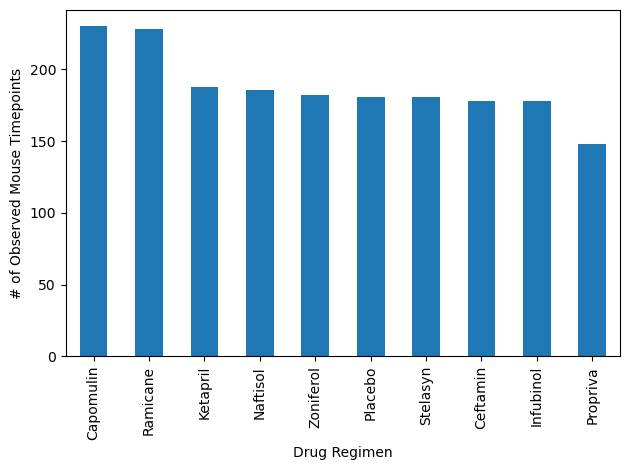

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_timepoint = cleaned_df.set_index(["Drug Regimen"])['Timepoint']
regimen_timepoint_grouped = regimen_timepoint.groupby("Drug Regimen")
timepoint_count = regimen_timepoint_grouped.count().sort_values(ascending=False)

panda_bar = timepoint_count.plot(kind="bar")
panda_bar.set_xlabel("Drug Regimen")
panda_bar.set_ylabel("# of Observed Mouse Timepoints")

plt.tight_layout()
plt.show()


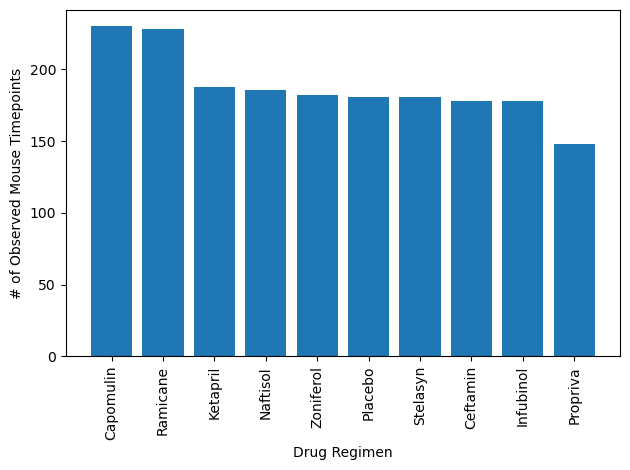

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

timepoint_count

x_axis = timepoint_count.index
tick_locations = np.arange(len(x_axis))

plt.bar(tick_locations, timepoint_count, align="center")
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

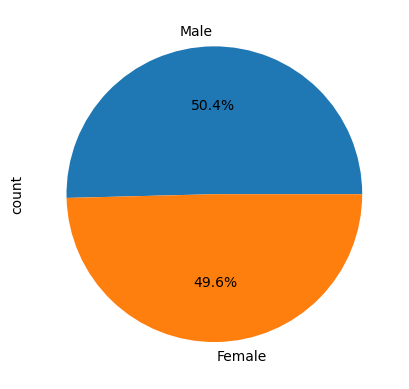

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
id_sex_grouped = cleaned_df.groupby('Sex')['Mouse ID'].nunique().sort_index(ascending=False)

# Make the pie chart
id_sex_grouped.plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.ylabel('count')
plt.show


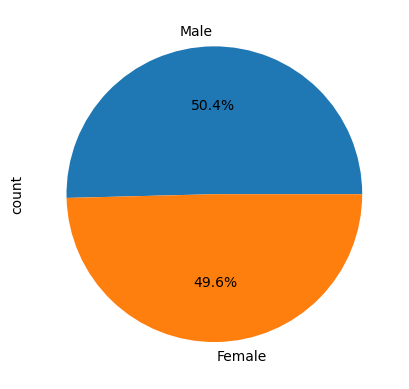

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
id_sex_grouped = cleaned_df.groupby('Sex')['Mouse ID'].nunique().sort_index(ascending=False)

# Make the pie chart

plt.pie(id_sex_grouped, labels=id_sex_grouped.index, autopct='%1.1f%%', startangle=0)
plt.ylabel('count')
plt.show()



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_idx = cleaned_df.groupby('Mouse ID')['Timepoint'].idxmax()
max_timepoint_df = cleaned_df.loc[max_timepoint_idx]
max_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merge_df=pd.merge(cleaned_df, max_timepoint_df, on="Mouse ID")
final_merge_indexed=final_merge_df.set_index(["Mouse ID"])
final_merge_indexed_cleaned = final_merge_indexed[final_merge_indexed['Timepoint_x'] == 0]
final_merge_indexed_cleaned

,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
Mouse ID,,,,,,,,,,,,,,
b128,0,45.0,0,Capomulin,Female,9,22,45,38.982878,2,Capomulin,Female,9,22
f932,0,45.0,0,Ketapril,Male,15,29,0,45.000000,0,Ketapril,Male,15,29
g107,0,45.0,0,Ketapril,Female,2,29,35,71.905117,0,Ketapril,Female,2,29
a457,0,45.0,0,Ketapril,Female,11,30,10,49.783419,0,Ketapril,Female,11,30
c819,0,45.0,0,Ketapril,Male,21,25,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t565,0,45.0,0,Capomulin,Female,20,17,45,34.455298,0,Capomulin,Female,20,17
i557,0,45.0,0,Capomulin,Female,1,24,45,47.685963,1,Capomulin,Female,1,24
m957,0,45.0,0,Capomulin,Female,3,19,45,33.329098,1,Capomulin,Female,3,19


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data = final_merge_indexed_cleaned.loc[final_merge_indexed_cleaned['Drug Regimen_x'] == treatment, 'Tumor Volume (mm3)_y']

    # add subset
    tumor_volume.append(tumor_vol_data)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Determine potential outliers
    outliers = tumor_vol_data[(tumor_vol_data < lower_bound) | (tumor_vol_data > upper_bound)]
    
    # Print results
    print(f"Potential outliers for {treatment}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3)_y, dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3)_y, dtype: float64)
Potential outliers for Infubinol: Mouse ID
c326    36.321346
Name: Tumor Volume (mm3)_y, dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3)_y, dtype: float64)


/var/folders/yb/7k35bt8s4098y_p64jddsx040000gn/T/ipykernel_3494/2401807510.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volume, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))


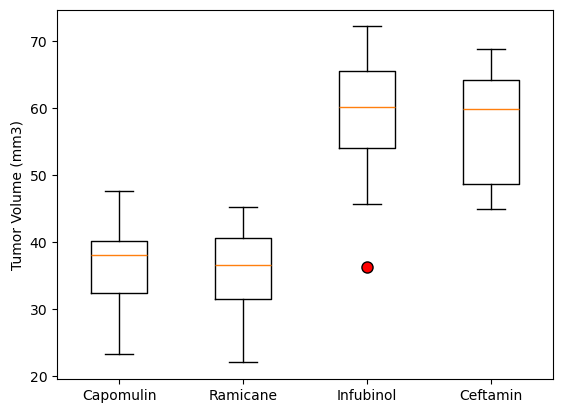

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure()
plt.boxplot(tumor_volume, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

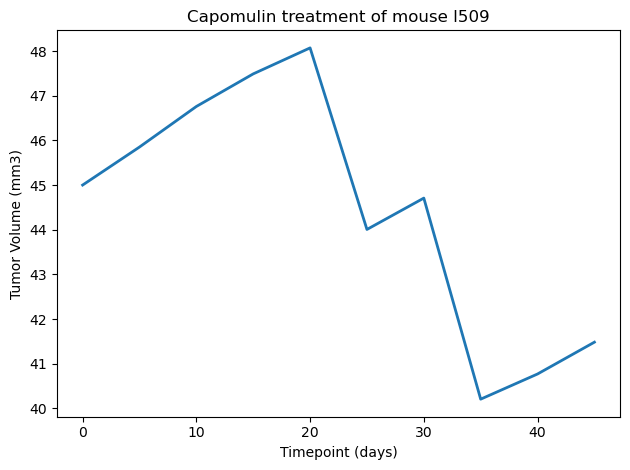

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509' 

capomulin_mouse = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == mouse_id)]
capomulin_mouse.head()

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.figure()
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], linestyle='-', linewidth=2)
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

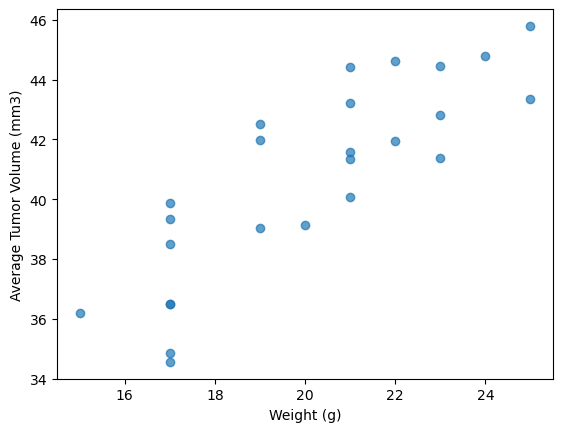

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_data.head()

capomulin_avg = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'], alpha=0.7)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

Correlation Coefficient:  0.84


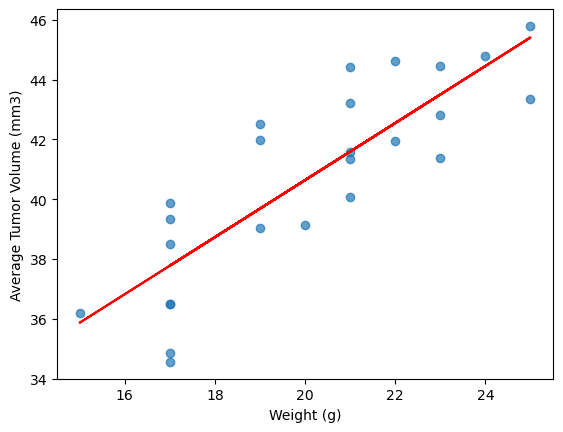

In [21]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = capomulin_avg['Weight (g)'].corr(capomulin_avg['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation: .2f}")

# Fit a linear regression model
coefficients = np.polyfit(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'], 1)
linear_regression_model = np.poly1d(coefficients)

# Scatter plot of mouse weight vs. average tumor volume
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'], alpha=0.7, label='Data Points')
plt.plot(capomulin_avg['Weight (g)'], linear_regression_model(capomulin_avg['Weight (g)']), color='red', label='Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()